In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import log_loss

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/man-juu/ML/main/markdataset3.csv')
df

,mark1,mark2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
X = df[['mark1', 'mark2']]
y = df['admitted']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
scaled_X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
scaled_X_train.head()

,mark1,mark2
11,0.644338,0.000000
47,0.970528,0.822143
85,0.550526,0.805539
28,0.455379,0.287886
93,0.636871,0.794564


In [ ]:
df = pd.concat([pd.DataFrame(scaled_X_train,columns=['mark1','mark2']),pd.DataFrame(y_train,columns=['admitted'])], axis=1, join='inner')

In [ ]:
print(f'Train data shape: {scaled_X_train.shape}')
print(f'Test data shape: {scaled_X_val.shape}')

Train data shape: (70, 2)
Test data shape: (30, 2)


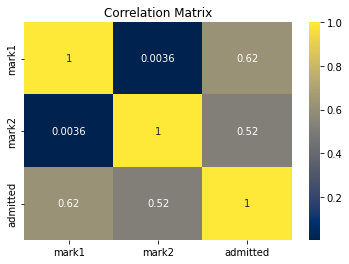

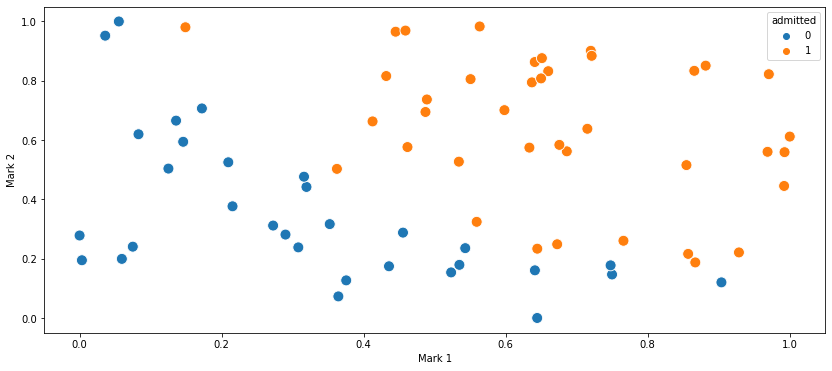

In [ ]:
sns.heatmap(data=df.corr(), cmap='cividis',annot=True)
plt.title("Correlation Matrix")

plt.figure(figsize=(14, 6))
sns.scatterplot(x='mark1', y='mark2', data=df, hue="admitted", s=120)
plt.xlabel("Mark 1")
plt.ylabel("Mark 2")

plt.show()

Seluruh korelasi variabel independen terhadap variabel dependen di atas 0.5 dan korelasi antar variabel independen di bawah 0.5, maka tidak ada variabel yang dibuang.

# Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate, n_iters):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weight = None
        self.intercept = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weight = np.zeros(n_features)
        self.intercept = 0

        loss = []
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weight) + self.intercept
            
            self.weight -= self.learning_rate * ((1 / n_samples) * np.dot(X.T, (y_predicted - y)))
            self.intercept -= self.learning_rate * ((1 / n_samples) * np.sum(y_predicted - y))
            
            loss.append(log_loss(y,y_predicted))
                        
        return self.weight, self.intercept, loss
            
    def predict(self, X, weight, intercept):
        linearmod = np.dot(X, weight) + intercept
        y_predicted = self._sigmoid(linearmod)
        y_predicted_class = [1 if i > 0.6 else 0 for i in y_predicted]
        return y_predicted_class

    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

In [ ]:
scaled_X_train = (scaled_X_train - scaled_X_train.mean()) / scaled_X_train.std()
losses = []
weights = []
intercepts = []
epochs = 400
for learning_rate in [0.01, 0.03, 0.1, 0.3]:
    model = LogisticRegression(learning_rate, n_iters=epochs)
    weight, intercept, loss = model.fit(scaled_X_train,y_train)
    weights.append(weight)
    intercepts.append(intercept)
    losses.append(loss)
    print(f'Learning Rate: {learning_rate}')
    print(f'Intercept/Bias: {intercept}')
    print(f'Weight/Theta: {weight}')
    print(f'')

Learning Rate: 0.01
Intercept/Bias: 0.5471418346039036
Weight/Theta: [0.30295798 0.2562804 ]

Learning Rate: 0.03
Intercept/Bias: 0.5571400083539245
Weight/Theta: [0.30875739 0.26116194]

Learning Rate: 0.1
Intercept/Bias: 0.5571428571428568
Weight/Theta: [0.30875921 0.26116345]

Learning Rate: 0.3
Intercept/Bias: 0.5571428571428573
Weight/Theta: [0.30875921 0.26116345]



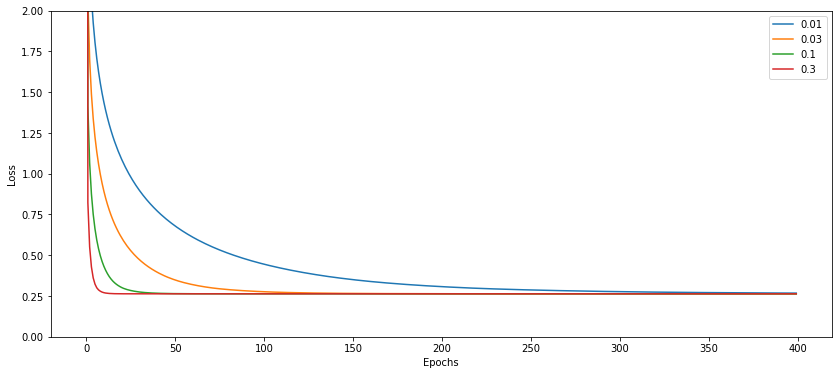

In [ ]:
plt.figure(figsize=(14,6))
for i in losses:
    compare = sns.lineplot(x=np.arange(0, epochs), y=i)
    plt.ylim((0, 2))
    plt.legend(labels=['0.01', '0.03', '0.1', '0.3'])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Building Model

In [ ]:
model = LogisticRegression(0.3, epochs)
w,b,l = model.fit(scaled_X_train, y_train)

In [ ]:
bias = b
print('Bias (Intercept) = ', bias)

Bias (Intercept) =  0.5571428571428573


In [ ]:
weight = w
weights = {'Weights':weight}
weight_list = pd.DataFrame(weights)
weight_list

,Weights
0,0.308759
1,0.261163


In [ ]:
def threshold(y):
  return [1 if i >= 0.5 else 0 for i in y]

# Train

In [ ]:
y_pred_raw = model.predict(scaled_X_train, weight, bias)
y_pred = threshold(y_pred_raw)

In [ ]:
pd.DataFrame({'y_pred_raw': y_pred_raw, 'y_pred Class': y_pred})

,y_pred_raw,y_pred Class
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
65,1,1
66,1,1
67,0,0
68,0,0


In [ ]:
pd.DataFrame({'y_pred Class': y_pred, 'y_dataset Class': y_train})

,y_pred Class,y_dataset Class
11,0,0
47,1,1
85,1,1
28,0,0
93,1,1
...,...,...
60,1,1
71,1,1
14,0,0
92,0,0


### Evaluate

In [ ]:
print(accuracy_score(y_pred,y_train))

0.9142857142857143


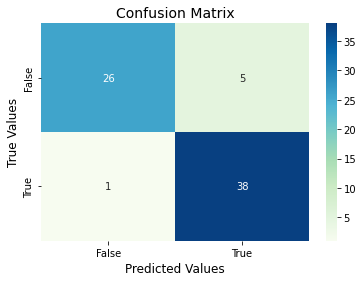

In [ ]:
conf_mtx = confusion_matrix(y_train, y_pred)
ax = sns.heatmap(conf_mtx, xticklabels=(['False','True']), yticklabels=(['False','True']), cmap='GnBu',annot=True)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

In [ ]:
print('CLASSIFICATION REPORT:\n', classification_report(y_train, y_pred))

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.88      0.97      0.93        39

    accuracy                           0.91        70
   macro avg       0.92      0.91      0.91        70
weighted avg       0.92      0.91      0.91        70



In [ ]:
print("F1-Score : " + str(f1_score(y_train, y_pred, average='micro')))

F1-Score : 0.9142857142857143


# Test

In [ ]:
y_test_raw = model.predict(scaled_X_val, weight, bias)
y_test_pred = threshold(y_test_raw)
pd.DataFrame({'y_test_pred': y_test_pred, 'y_test_true': y_val})

,y_test_pred,y_test_true
83,1,1
53,1,0
70,1,0
45,1,0
44,1,0
39,1,0
22,1,0
80,1,1
10,1,0
0,1,0


In [ ]:
print(accuracy_score(y_test_pred, y_val))

0.7


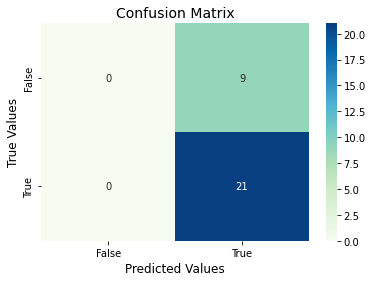

In [ ]:
conf_mtx = confusion_matrix(y_val, y_test_pred)
ax = sns.heatmap(conf_mtx, xticklabels=(['False','True']), yticklabels=(['False','True']), cmap='GnBu',annot=True)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print('CLASSIFICATION REPORT:\n', classification_report(y_val, y_test_pred))

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      1.00      0.82        21

    accuracy                           0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30



In [ ]:
print("F1-Score : " + str(f1_score(y_val, y_test_pred, average='micro')))

F1-Score : 0.7
